# Mpox Genome Analysis using Biopython

### Fetch Mpox Genome from NCBI
**NC_063383** - Mpox genome used here was sequenced from a sample

In [1]:
!pip install Biopython
from Bio import Entrez, SeqIO
Entrez.email = ""
handle = Entrez.efetch(db="nucleotide", id="NC_063383", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.4 MB/s eta 0:00:00


In [2]:
recs

[SeqRecord(seq=Seq('ATTTTACTATTTTATTTAGTGTCTAGAAAAAAATGTGTGACCCACGACCGTAGG...AAT'), id='NC_063383.1', name='NC_063383', description='Monkeypox virus, complete genome', dbxrefs=['BioProject:PRJNA485481'])]

In [3]:
Mpox_dna = recs[0].seq

In [4]:
Mpox_dna

Seq('ATTTTACTATTTTATTTAGTGTCTAGAAAAAAATGTGTGACCCACGACCGTAGG...AAT')

In [5]:
print(f'The genome of Mpox consists of {len(Mpox_dna)} nucleotides.')

The genome of Mpox consists of 197209 nucleotides.


In [6]:
# molecular weight
from Bio.SeqUtils import molecular_weight
molecular_weight(Mpox_dna)

60910683.70525165

In [7]:
# GC content - higher GC content implies more stable molecule due to G and C forming triple hydrogen bonds
from Bio.SeqUtils import gc_fraction
print(f'The GC content of Mpox genome is {gc_fraction}%')
a = gc_fraction(Mpox_dna)
GC = a*100

The GC content of Mpox genome is <function gc_fraction at 0x7efc2d735d80>%


In [8]:
# prompt: call <function gc_fraction at 0x7cb2ac3e24d0>%

GC


33.029932710981754

### Distribution of nucleotides in Mpox genome

In [9]:
count_nucleotides = {
    'A': Mpox_dna.count('A'),
    'T': Mpox_dna.count('T'),
    'C': Mpox_dna.count('C'),
    'G': Mpox_dna.count('G')
}

In [10]:
count_nucleotides

{'A': 66193, 'T': 65878, 'C': 32602, 'G': 32536}

Text(0.5, 1.0, 'Nucleotide Frequency')

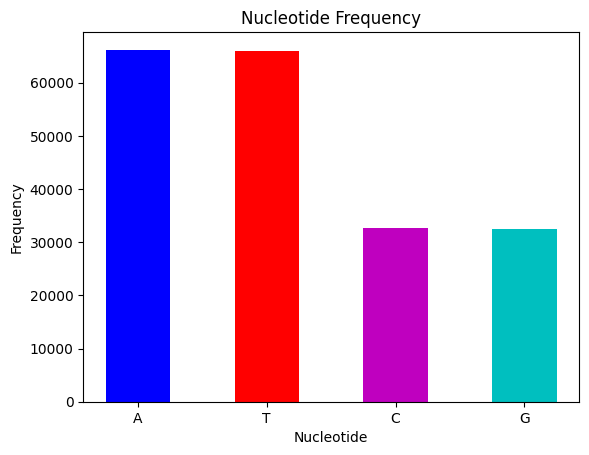

In [11]:
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

First observation: The frequency of the nucleotides A and T is higher than the frequency of C and G.

Understanding this genetic information is the key to find cures and vaccines. So, the question here is: How do we extract information from this long sequence of letters?

This process is called gene expression: Gene expression is the process by which information from a gene is used in the synthesis of a functional gene product. These products are often proteins

### Transcription
Transcription is the first step in gene expression. It involves copying a gene's DNA sequence to make an RNA molecule.

In [12]:
Mpox_mrna = Mpox_dna.transcribe()
Mpox_mrna

Seq('AUUUUACUAUUUUAUUUAGUGUCUAGAAAAAAAUGUGUGACCCACGACCGUAGG...AAU')

### Translation
Translation is the process that takes the information passed from DNA as messenger RNA and turns it into a series of amino acids.

In [13]:
Mpox_aa = Mpox_mrna.translate()
Mpox_aa

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('ILLFYLVSRKKCVTHDRRKL*RVRKINRL*RPSERGLIFL*DLSKRERIKTFYD...IVK')

In [14]:
#most common amino acids
from collections import Counter
common_amino = Counter(Mpox_aa)
common_amino.most_common(10)

[('L', 6920),
 ('I', 6772),
 ('S', 5568),
 ('*', 4471),
 ('Y', 3834),
 ('R', 3793),
 ('F', 3676),
 ('T', 3578),
 ('V', 3551),
 ('N', 3437)]

Text(0.5, 1.0, 'Protein Sequence Frequency')

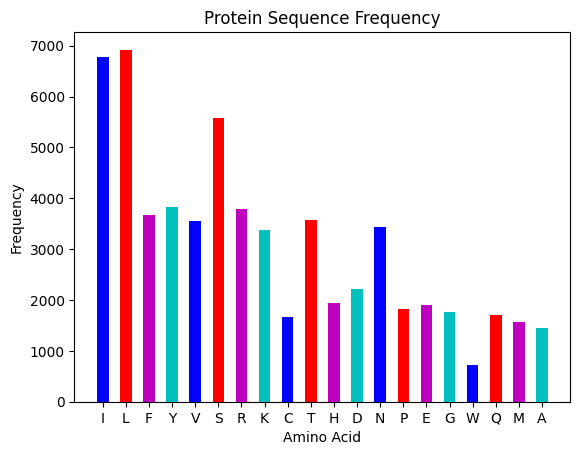

In [15]:
del common_amino['*']

width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')

In [16]:
print(f"Mpox's genome has {sum(common_amino.values())} amino acids")

Mpox's genome has 61265 amino acids


The split() function splits the sequence at any stop codon and keeps the amino acids chains separated. This makes it easier for further analysis.

In [17]:
proteins = Mpox_aa.split('*')

In [18]:
proteins[:5]

[Seq('ILLFYLVSRKKCVTHDRRKL'),
 Seq('RVRKINRL'),
 Seq('RPSERGLIFL'),
 Seq('DLSKRERIKTFYDSIRKRFNIFVRPIEERKRWLVKIFFLVQKSMF'),
 Seq('NIWTRINLSV')]

In [19]:
print(f'We have {len(proteins)} amino acids in the Mpox genome')

We have 4472 amino acids in the Mpox genome


It's worth to mention that not all the amino acids sequences are proteins. Only the sequences with more than 20 amino acids code for functional proteins. The short amino acid sequences are oligopeptides and have other functionalities. Here, we will focus on the chains with more than 20 amino acid chains: Proteins.

In [20]:
for protein in proteins:
    if len(protein) < 20:
        proteins.remove(protein)

In [21]:
print(f'We have {len(proteins)} proteins with more than 20 amino acids in the Mpox genome')

We have 2473 proteins with more than 20 amino acids in the Mpox genome


In [22]:
top_5_proteins = sorted(proteins, key = len)

In [23]:
top_5_proteins[-1]

Seq('MDAAIRGNDVIFVLKTIGVPSACRQNEDPRFVEAFKCDELERYIDNNPECTLFE...SSP')

In [24]:
len(top_5_proteins[-1])

785

In [47]:
# prompt: find its mRNA sequence

# Assuming top_5_proteins[-1] represents the longest protein sequence
longest_protein = top_5_proteins[-1]

# Find the corresponding mRNA sequence using back-translation
# Note that this may not be entirely accurate as multiple codons can code for the same amino acid
def back_translate(protein):
  rna_codon_table = {
      "A": ["GCU", "GCC", "GCA", "GCG"],
      "C": ["UGU", "UGC"],
      "D": ["GAU", "GAC"],
      "E": ["GAA", "GAG"],
      "F": ["UUU", "UUC"],
      "G": ["GGU", "GGC", "GGA", "GGG"],
      "H": ["CAU", "CAC"],
      "I": ["AUU", "AUC", "AUA"],
      "K": ["AAA", "AAG"],
      "L": ["UUA", "UUG", "CUU", "CUC", "CUA", "CUG"],
      "M": ["AUG"],
      "N": ["AAU", "AAC"],
      "P": ["CCU", "CCC", "CCA", "CCG"],
      "Q": ["CAA", "CAG"],
      "R": ["CGU", "CGC", "CGA", "CGG", "AGA", "AGG"],
      "S": ["UCU", "UCC", "UCA", "UCG", "AGU", "AGC"],
      "T": ["ACU", "ACC", "ACA", "ACG"],
      "V": ["GUU", "GUC", "GUA", "GUG"],
      "W": ["UGG"],
      "Y": ["UAU", "UAC"],
      "*": ["UAA", "UAG", "UGA"]
  }
  mrna_seq = ""
  for amino_acid in protein:
    if amino_acid in rna_codon_table:
      mrna_seq += rna_codon_table[amino_acid][0] # Choose the first codon for simplicity
    else:
      print(f"Unknown amino acid: {amino_acid}")
      return None
  return mrna_seq

longest_protein_mrna = back_translate(longest_protein)
print(f"mRNA sequence for the longest protein:\n{longest_protein_mrna}")


mRNA sequence for the longest protein:
AUGGAUGCUGCUAUUCGUGGUAAUGAUGUUAUUUUUGUUUUAAAAACUAUUGGUGUUCCUUCUGCUUGUCGUCAAAAUGAAGAUCCUCGUUUUGUUGAAGCUUUUAAAUGUGAUGAAUUAGAACGUUAUAUUGAUAAUAAUCCUGAAUGUACUUUAUUUGAAUCUUUACGUGAUGAAGAAGCUUAUUCUAUUGUUCGUAUUUUUAUGGAUGUUGAUUUAGAUGCUUGUUUAGAUGAAAUUGAUUAUUUAACUGCUAUUCAAGAUUUUAUUAUUGAAGUUUCUAAUUGUGUUGCUCGUUUUGCUUUUACUGAAUGUGGUGCUAUUCAUGAAAAUGUUAUUAAAUCUAUGCGUUCUAAUUUUUCUUUAACUAAAUCUACUAAUCGUGAUAAAACUUCUUUUCAUAUUAUUUUUUUAGAUACUUAUACUACUAUGGAUACUUUAAUUGCUAUGAAACGUACUUUAUUAGAAUUAUCUCGUUCUUCUGAAAAUCCUUUAACUCGUUCUAUUGAUACUGCUGUUUAUCGUCGUAAAACUACUUUACGUGUUGUUGGUACUCGUAAAAAUCCUAAUUGUGAUACUAUUCAUGUUAUGCAACCUCCUCAUGAUAAUAUUGAAGAUUAUUUAUUUACUUAUGUUGAUAUGAAUAAUAAUUCUUAUUAUUUUUCUUUACAACGUCGUUUAGAAGAUUUAGUUCCUGAUAAAUUAUGGGAACCUGGUUUUAUUUCUUUUGAAGAUGCUAUUAAACGUGUUUCUAAAAUUUUUAUUAAUUCUAUUAUUAAUUUUAAUGAUUUAGAUGAAAAUAAUUUUACUACUGUUCCUUUAGUUAUUGAUUAUGUUACUCCUUGUGCUUUAUGUAAAAAACGUUCUCAUAAACAUCCUCAUCAAUUAUCUUUAGAAAAUGGUGCUAUUCGUAUUUAUAAAACUGGUAAUCCUCAUUCUUGUAAAGUUAAAAUUGUUCCUU

Save this protein to file for further analysis

In [25]:
with open("protein_seq.fasta", "w") as file:
    file.write(f">Mpox protein\n{top_5_proteins[-1]}")

## Summary of Findings
- Sequence length: 197209 base pairs
- GC content: 33.02%
- Has high amount of Leucine L and Serine S
- 2473 proteins with more than 20 amino acids
- The largest protein is of length of 785 amino acid.


In [26]:
# prompt: generate excel containing all proteins and sequece length of protein in Mpox

import pandas as pd

# Create a list to store protein data
protein_data = []

for protein in proteins:
    protein_data.append([protein, len(protein)])

# Create a Pandas DataFrame from the protein data
df = pd.DataFrame(protein_data, columns=['Protein Sequence', 'Sequence Length'])

# Export the DataFrame to an Excel file
df.to_excel('mpox_proteins.xlsx', index=False)

print("Excel file 'mpox_proteins.xlsx' created successfully!")


Excel file 'mpox_proteins.xlsx' created successfully!


In [ ]:
top_5_proteins[-1]

Seq('MDAAIRGNDVIFVLKTIGVPSACRQNEDPRFVEAFKCDELERYIDNNPECTLFE...SSP')

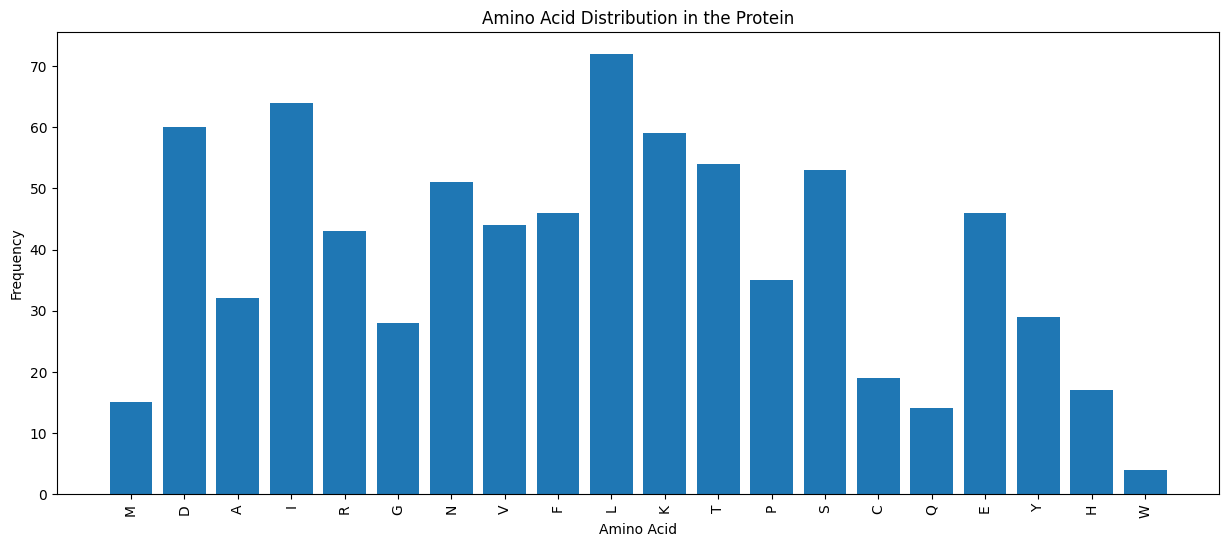

In [29]:


protein_sequence = SeqIO.read("protein_seq.fasta", "fasta").seq
# Import necessary libraries
import matplotlib.pyplot as plt
from collections import Counter

# Calculate amino acid frequencies
amino_acid_counts = Counter(protein_sequence)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(amino_acid_counts.keys(), amino_acid_counts.values())
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.title("Amino Acid Distribution in the Protein")
plt.xticks(rotation=90)
plt.show()


In [30]:
len(protein_sequence)

785

In [34]:
# prompt: generate a code to draw structure of "protein_sequence" file and analyze in 3-D geometry

!pip install biopython py3Dmol

from Bio.PDB import PDBParser, PDBIO, Select
from Bio.PDB.Polypeptide import PPBuilder
import py3Dmol

# Function to generate a 3D structure from a protein sequence
def generate_3d_structure(protein_sequence):
    # You'll need to use a tool like RoseTTAFold or AlphaFold to predict the structure
    # For simplicity, let's assume you have a PDB file representing the structure.
    # Replace "predicted_structure.pdb" with the actual file path.
    pdb_file = "predicted_structure.pdb"  # You'll need to obtain this PDB file from a structure prediction tool.

    # Load the PDB structure
    parser = PDBParser()
    structure = parser.get_structure("8XJ7", pdb_file)

    # Extract the polypeptide chain
    ppb = PPBuilder()
    for pp in ppb.build_peptides(structure):
        return pp

# Function to visualize the protein structure
def visualize_structure(polypeptide):
    view = py3Dmol.view(width=800, height=600)
    view.addModel(polypeptide.get_sequence(), 'pdb')
    view.setStyle({'cartoon': {'color': 'spectrum'}})
    view.zoomTo()
    view.show()


if __name__ == "__main__":
    # Load the protein sequence from the file
    with open("protein_seq.fasta", "r") as file:
        protein_sequence = file.read().splitlines()[1]  # Skip the header line

    # Generate the 3D structure (replace this with your structure prediction method)
    polypeptide = generate_3d_structure(protein_sequence)

    if polypeptide:
        visualize_structure(polypeptide)
    else:
        print("Structure prediction or PDB loading failed.")



FileNotFoundError: [Errno 2] No such file or directory: 'predicted_structure.pdb'

In [39]:
# prompt: generate a code to draw structure of "protein_sequence" file and analyze in 3-D geometry

!pip install biopython py3Dmol

from Bio.PDB import PDBParser, PDBIO, Select
from Bio.PDB.Polypeptide import PPBuilder
import py3Dmol

# Function to generate a 3D structure from a protein sequence
def generate_3d_structure(protein_sequence):
    # You'll need to use a tool like RoseTTAFold or AlphaFold to predict the structure
    # For simplicity, let's assume you have a PDB file representing the structure.
    # Replace "predicted_structure.pdb" with the actual file path.
    # pdb_file = "predicted_structure.pdb"  # You'll need to obtain this PDB file from a structure prediction tool.
    # The code is looking for a file named '8XJ7.pdb', so change the pdb_file variable accordingly
    pdb_file = "mmdb_8XJ7.pdb"

    # Load the PDB structure
    parser = PDBParser()
    structure = parser.get_structure("Protein", pdb_file)

    # Extract the polypeptide chain
    ppb = PPBuilder()
    for pp in ppb.build_peptides(structure):
        return pp

# Function to visualize the protein structure
def visualize_structure(polypeptide):
    view = py3Dmol.view(width=800, height=600)
    view.addModel(polypeptide.get_sequence(), 'pdb')
    view.setStyle({'cartoon': {'color': 'spectrum'}})
    view.zoomTo()
    view.show()


if __name__ == "__main__":
    # Load the protein sequence from the file
    with open("protein_seq.fasta", "r") as file:
        protein_sequence = file.read().splitlines()[1]  # Skip the header line

    # Generate the 3D structure (replace this with your structure prediction method)
    polypeptide = generate_3d_structure(protein_sequence)

    if polypeptide:
        visualize_structure(polypeptide)
    else:
        print("Structure prediction or PDB loading failed.")

PDBConstructionException: Invalid or missing coordinate(s) at line 19971.

In [45]:
# prompt: generate a code to draw structure of "/content/mmdb_8XJ7.pdb" file and analyze in 3-D and zoom to analyze

import py3Dmol

def show_pdb(pdb_file):
  view = py3Dmol.view(width=800, height=600)
  view.addModel(open(pdb_file,'r').read(),'pdb')
  view.setStyle({'cartoon': {'color':'spectrum'}})
  view.zoomTo()
  view.show()

show_pdb("/content/mmdb_8XJ7.pdb")


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [46]:
# prompt: generate a suitable ligand to dock it online

# We can use a tool like SwissDock or AutoDock Vina to perform the docking.
# Here's a basic example using SwissDock:
# 1. Generate a suitable ligand:
# You can search for potential ligands that might interact with the protein target.
# For example, you can use PubChem or ChEMBL to identify small molecules that are known to interact with viral proteins.
# Or you can use a library of existing compounds.

# For this example, let's assume we've identified a potential ligand and have its structure in SDF or MOL2 format.
# Download the ligand structure file.
# Make sure the ligand structure file is present in your Colab environment, e.g. /content/ligand.sdf.

# You can also generate a suitable ligand using online tools like ChemDraw or Avogadro.
# In the following example, we're generating a basic ligand 'benzene'.
# You can replace it with a more specific one based on your analysis.

# We need to generate a 3D structure for the ligand. We can use RDKit for that.

!pip install rdkit-pypi

from rdkit import Chem
from rdkit.Chem import AllChem

# Create a molecule object for benzene
mol = Chem.MolFromSmiles('c1ccccc1')

# Generate 3D coordinates
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)

# Save the 3D structure in MOL2 format
Chem.MolToMolFile(mol, 'ligand.mol2')

print("Ligand generated and saved as ligand.mol2")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 43.5 MB/s eta 0:00:00
Ligand generated and saved as ligand.mol2


In [49]:
# prompt: generate reverse complement of following fasta file"/content/mpox785.fasta"

from Bio import SeqIO
from Bio.Seq import Seq

def reverse_complement(fasta_file):
  """Generates the reverse complement of a DNA sequence in a FASTA file."""

  for record in SeqIO.parse(fasta_file, "fasta"):
    dna_sequence = record.seq
    reverse_complement_seq = dna_sequence.reverse_complement()
    return reverse_complement_seq

# Replace "/content/mpox785.fasta" with the actual path to your FASTA file
reverse_complement_sequence = x1 = reverse_complement("/content/mpox785.fasta")

print(f"Reverse Complement:\n{reverse_complement_sequence}")


Reverse Complement:
TTACGGAGATGAAATATCCTCTATGAATATATATTGCAGATATTCATCACTAACATTGGCAAATTTCTTATGTCTATTGATGAAGCTCTCTATATCGTGTCCAAATAGTCTAGAATTAAAATACTTGGATATTTTCTGTTGGAAAGTAGTCAACGGAAGAGTAACCACATTATCGTACAATATATATCCCTTTTTGGAGAGGTCCGTCATTAATGGAATATGCTTTACAGAGCTAGATACCAACAGAGTACCTATTTTGAGATAGAATGCAAAGTCCGGAATCTCTTCCGGTGTAGGATATAGTTTCATAATAGGAATATGATATTTTTTGTACCATTTAACCAACAAGTATAGAAATGCGAATCTATATCTATTATTCTGTATTTTACCATCTAATCCCTCGTCTAATAGTTTGACTTTATCGTACGCGTCATTATTTTCAGCAGCCTCTCTACCAGAAGGTTGAGAAAAGTGTGTTCTGAATCGCACGACGGCAATTCTTCTCATTAATGCGTTATCTATCCTATCAAAGACAGGTTTGTAATTAGTATCGATAATGATTGTCGCATGGTTTCTATTATTAATTTTATTGGAGAAACACGGTCTTCCAATGACACAAGGTTCTGTCAACTTTTTAATATTATCAGATCTAATTTTCTTTGATCCACTACATGCAAAATCAGGTAGTTCGCTACAGAATACAGATCTTTTTAAATGCATATTAGCGATAAATGGATTAGGTCCTTTATCCAATACATCTGTTAAAATTGTTTGACCCGTCTCGACAAACAGGTCACCGATAGCAGACTTTAACAAACGTTTGGTTGTCGACTTCCCAGTTGCGGTTTCTCCAAAAAAGAATGTTAAACATCCTTTGGTAGCACCACATAAACAACTAGATAATGTTTTTTCATACAGCTCTCTATTTTTCTTATTTTCATCCGTTAATGGTTGGATATCGTTAATGATATTCATTAACT

In [51]:
guide_RNA = x1.transcribe()

In [55]:
func_guide_RNA = guide_RNA[0:30]
print(f"Functioning gRNA/iRNA Sequence:\n{func_guide_RNA}")
# This can be used to silence the mRNA

Functioning gRNA/iRNA Sequence:
UUACGGAGAUGAAAUAUCCUCUAUGAAUAU


In [56]:
# prompt: generate a functional guide RNA for CRISPER/CAS9 of DNA sequence"/content/mpox785.fasta"

from Bio import SeqIO
from Bio.Seq import Seq

def generate_guide_rna(fasta_file):
  """Generates a potential guide RNA sequence for CRISPR/Cas9 from a FASTA file."""

  for record in SeqIO.parse(fasta_file, "fasta"):
    dna_sequence = record.seq
    # Choose a target region (you can adjust this based on your needs)
    target_region = dna_sequence[0:30]  # Example: first 30 nucleotides
    guide_rna = target_region.transcribe()
    return guide_rna

# Replace "/content/mpox785.fasta" with the actual path to your FASTA file
guide_rna_sequence = generate_guide_rna("/content/mpox785.fasta")

print(f"Potential guide RNA sequence:\n{guide_rna_sequence}")


Potential guide RNA sequence:
AUGGAUGCGGCUAUUAGAGGUAAUGAUGUU
